# ANALYSE EXPLORATOIRE DU JEU DE DONNES SUR LES MALADIES CARDIOVASCULAIRES (MCV)

 Analyse Exploratoire des Données

### Exercice : 
- Analyse exploratoire des données

### Meta données

**- Contexte**

Les maladies cardiovasculaires sont la première cause de décès dans le monde, faisant environ 17,9 millions de vies chaque année, ce qui représente 31 % de tous les décès dans le monde. Quatre décès sur 5 par MCV sont dus à des crises cardiaques et à des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes de moins de 70 ans. L'insuffisance cardiaque est un événement courant causé par les maladies cardiovasculaires et cet ensemble de données contient 11 caractéristiques qui peuvent être utilisées pour prédire une éventuelle maladie cardiaque.

Les personnes atteintes de maladies cardiovasculaires ou à haut risque cardiovasculaire (en raison de la présence d'un ou plusieurs facteurs de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou une maladie déjà établie) ont besoin d'une détection et d'une gestion précoces dans lesquelles un modèle d'apprentissage automatique peut être d'une grande aide.


**- Informations sur les attributs**

AGE : âge du patient,

SEXE : sexe du patient [homme, femme]

TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]

PAR : pression artérielle au repos [mm Hg]

CHOLESTEROL : cholestérol sérique [mm/dl]

GAJ : glycémie Ã  jeun [1 : si glycémie Ã  jeun > 120 mg/dl, 0 : sinon]

ECG au repos : résultats de l'electrocardiogramme au repos [Normal : normal, ST : présentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable]

FCMAX : fréquence cardiaque maximale atteinte

ANGINE : angine induite par l'exercice [Oui, Non]

DEPRESSION : Valeur numérique mesurée en dépression

PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]

COEUR : maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]

## 1. Description des variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### a) Affichage des informations de base

In [86]:
DF = pd.read_excel('heart.xlsx')
df = DF.copy()
df.head(5)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


#### b) Description de base

In [87]:
df.rename(columns = {'DEPRESSION ':'DEPRESSION'}, inplace = True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [111]:
df.nunique()

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

<AxesSubplot:ylabel='None'>

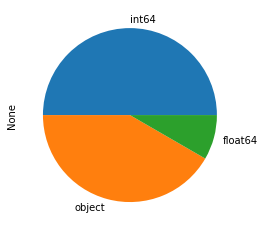

In [36]:
df.dtypes.value_counts().plot.pie()

In [6]:
df.shape

(918, 12)

In [5]:
df.describe()

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 2. Analyse exploratoire

#### a) Vérification de la présence de lignes doubles

In [12]:
df.duplicated().sum()

0

#### b) Vérification de données manquantes

#### c) Proportion des modalités de la variable cible

In [35]:
(df['CŒUR'].value_counts(normalize = True ))*100

1    55.337691
0    44.662309
Name: CŒUR, dtype: float64

### Etude individuelle des variables explicatives

####  d) Variables quantitatives 

<Figure size 432x288 with 0 Axes>

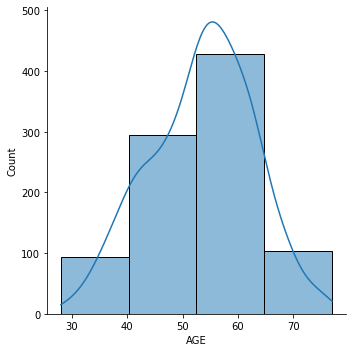

<Figure size 432x288 with 0 Axes>

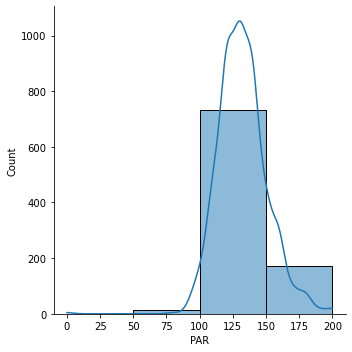

<Figure size 432x288 with 0 Axes>

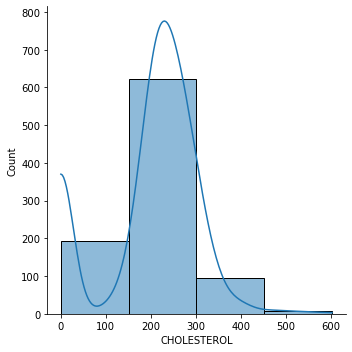

<Figure size 432x288 with 0 Axes>

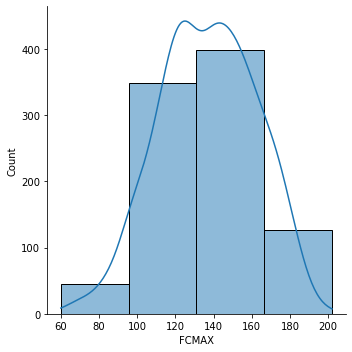

<Figure size 432x288 with 0 Axes>

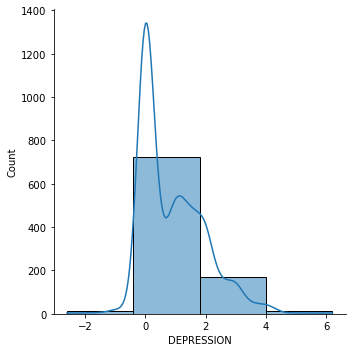

In [114]:
for col in df.drop(['CŒUR','GAJ'],axis = 1).select_dtypes(exclude=object):
    plt.figure()
    sns.displot(df[col], bins=4, kde=True)

#### e) Variables qualitatives

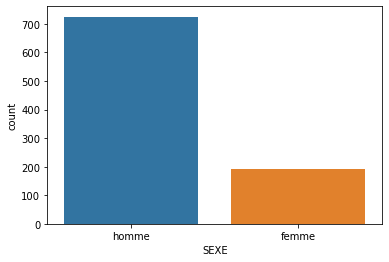

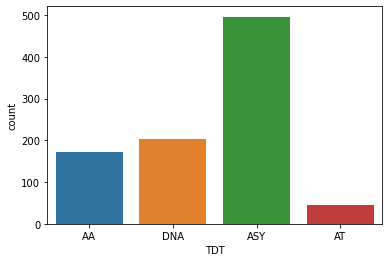

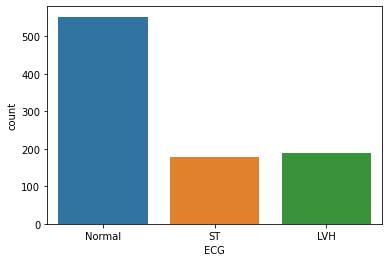

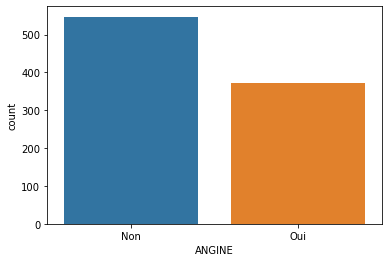

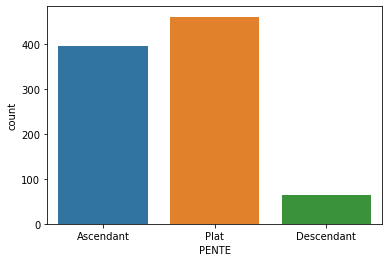

In [48]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.countplot(df[col])

In [61]:
(df['PAR'] == 0).sum()

1

#### f) Variables quantitatives vs variables qualitative

<AxesSubplot:xlabel='SEXE', ylabel='CHOLESTEROL'>

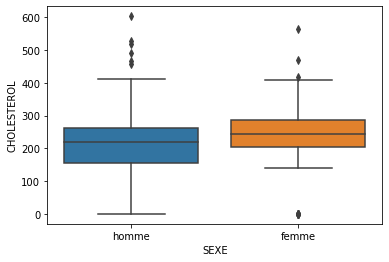

In [124]:
sns.boxplot(x='SEXE', y='CHOLESTEROL', data=df)

<Figure size 1080x720 with 0 Axes>

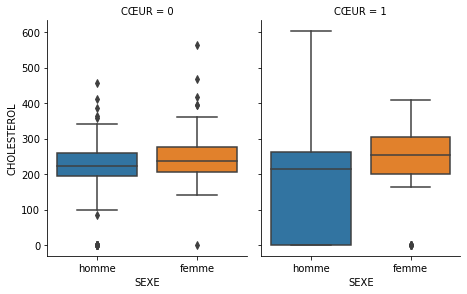

In [125]:
plt.figure(figsize=(15,10))
sns.catplot(x='SEXE', y='CHOLESTEROL', col='CŒUR', data=df, kind='box', height=4, aspect=.8)

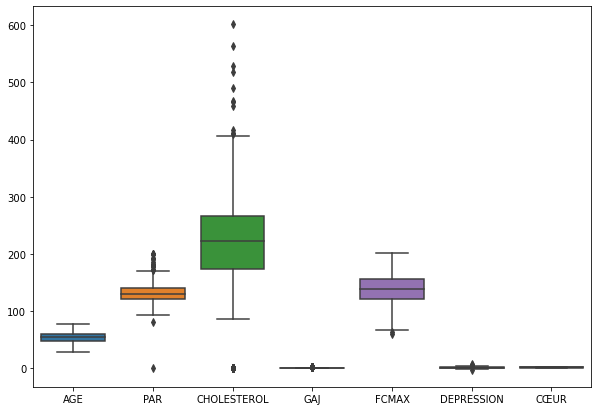

In [126]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df[[col for col in df.select_dtypes(exclude=object)]]);

#### g) Carte des corrélations des variables quantitatives

<AxesSubplot:>

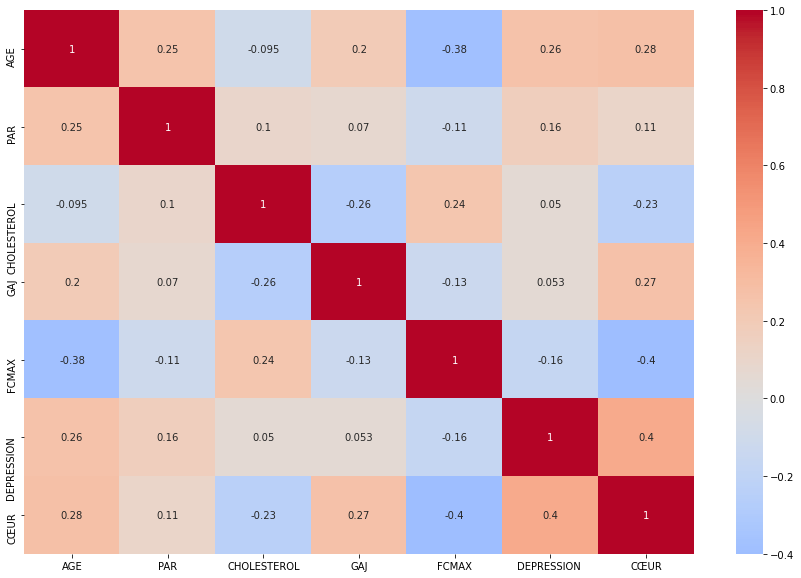

In [69]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
sns.heatmap(df.select_dtypes(exclude = object).corr(), annot = True,  center= 0, cmap= 'coolwarm')

#### g) Etude des corrélations entre les variables qualitatives et la variable cible

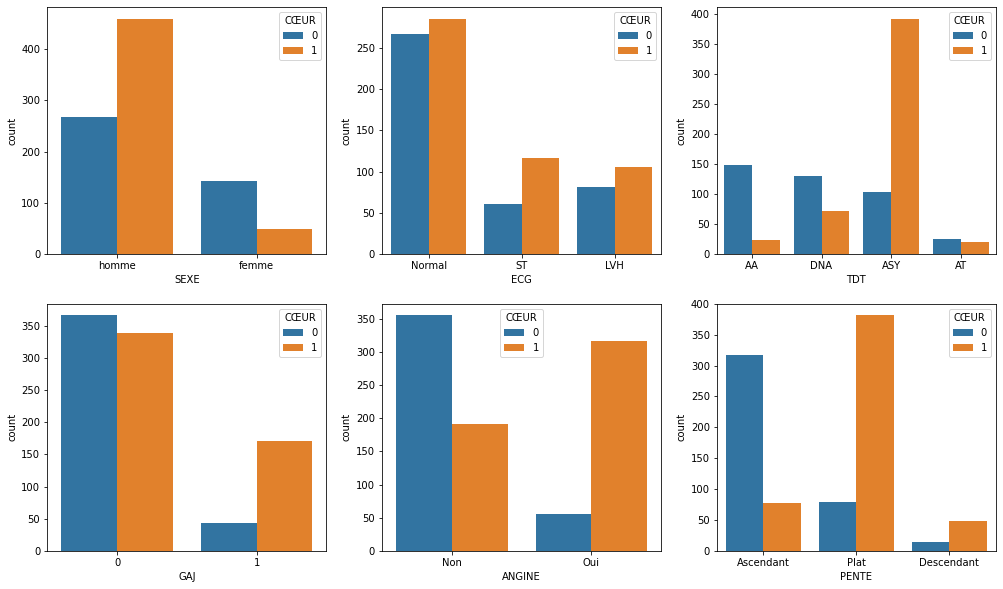

In [115]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,10))
col = ['SEXE','ECG','TDT','GAJ','ANGINE','PENTE']
for i, feature in enumerate(col):
    ax = axes[int(i/3), i%3]
    if feature != 'CŒUR':
        sns.countplot(x=feature, hue='CŒUR', data=df, ax=ax)

# Observations
## 1. Description de base
#### a) 
- Nous avons supprimé l'espace après le nom de la colonne DEPRESSION
#### b) 
- Nous avons 12 variables pour 918 ligne. ce qui est un peu raisonable en terle de proportion.

## 2. Analyse exploratoire
#### a)
- Notre jeu de données ne comporte pas de valeurs en double
#### b)
- Le jeu de données ne comporte pas de valeurs manquantes
#### c) 
- Le jeu de données est composé de deux modalités qui sont relativement bien repartie avec 55.33 % de personnes ayant la maladie et 44.66 % n'ayant pas la maladie
#### d)
- La variable GAJ représentant le taux de glycémie à jeune est une variable continue qui a été encodée
- Environ 80 % des individus ont un age compris entre 41 et 65 ans
- La plupart des individus ont une pression artérielle au répos comprise entre 100 et 150 suivie de quelques individus entre 150 et 200. Il reste très peut de personnes qui dont les pressions se situent entre 0 et 100
- Notons qu'environ 80 % des individus ont le maximum de leur fréquence cardiaque maximales comprisent entre 95 et 170.
- La majorité des individus ont une dépression comprise entre -0,08 et 1,8 suivie de quelques individus entre 1,8 et 4. Il reste très peut de personnes qui dont les dépressions sont inférieur à -0,08 d'une part et supérieur à 4 d'autres part.
#### e)
- Environ 3/4 des individus de notre jeu de données sont des hommes et environ la moitié ont des douleurs asymptomatiques.
- Plus de la moitié des individus ont un résultat de l'électrocardiogramme au repos (ECG) normal
- Plus de la moitié des individus ont une angine non induite par l'exercice.
- La pente du segment ST d'exercice de pointe est soit Ascendant ou plat pour la quasi totalité des individus.
- On note un individu avec une pression artérielle nullze. ce qui semble être une valeur abbérante
#### f)
- Apparemment, les patients femmes ont des indices de cholestérol plus élevés que les patients hommes.
- Le taux de cholestérol et le sexe ne semblent pas discriminés la variable cible
#### g)
- A première vue, Il ne semble pas y avoir de corrélation ente l'age des individus et leur taux de cholesterol
#### h)
- On observe très peu de disparité entre le nombre d'hommes malade et en bonne santé à la différence des femmes ou il y a une disparité conséquente.
- Le nombre de sujet malade reste élevé quelques soit la modalié du résultat de l'électrocardiogramme au repos (ECG). Nous pouvons penser que cette variable est corrélé à la cible
- La modalité asymptomatique du type de douleur enregistre le plus grand nombre de malades.